# <center> Markov Model </center>
In this question, we will simulate the page rank.

In [33]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# get inputs, we have a test case that we get if we input test: True
def get_inputs(test: bool) -> list:
    n = 3
    first_try = [0,0,1]
    transition_matrix = []

    sample_test = test 
    if not sample_test:
        # number of pages
        n = int(input())

        # the probabilities of occurence in the first try
        first_try = list(map(float,input().split()))

        transition_matrix = []

        # the probability matrix of going from page: row to page: col
        for _ in range(n):
            transition_matrix.append(list(map(float,input().split())))
    else : 
        n = 3
        first_try = [0,0,1]
        transition_matrix = [ [0.3, 0.2, 0.5]
                            ,[0.4, 0.3, 0.3]
                            ,[0.3, 0.4, 0.3]]
    return n,first_try,transition_matrix


# generate the CDF


def generate_CDF(pdf: list) -> list:
    CDF_list = []
    sum_first = 0
    for number in pdf:
        sum_first += number
        CDF_list.append(sum_first)
    return CDF_list

def get_CDFs(first_try: list, transition_matrix: list, n: int) -> tuple:
    first_CDF = generate_CDF(first_try)

    transition_CDF = []

    for row in range(n):
        transition_CDF.append(generate_CDF(transition_matrix[row]))
    return first_CDF,transition_CDF

def get_next_state(current_state:int,transition_CDF:list,n:int) -> int:
    random_simulation = random.random()
    next_state = 0
    for i in range(n-1):
        if transition_CDF[current_state][i] < random_simulation <= transition_CDF[current_state][i+1] :
            next_state = i+1
    return next_state

    
# print(first_CDF)
# print("------------")
# print(transition_CDF)

After Receiving our input, we start our simulation.<br>
We have two parameters in each move: 
<li> the state we our in
<li> the state we want to go to

We would want to use random and CDF to find our random number.

In [35]:
def simulate(number_of_steps:int,number_of_simulations: int,n:int,first_CDF:list,transition_CDF: list) -> list :
    states = [0 for _ in range(n)]
    for _ in range(number_of_simulations):
        first_random = random.random()
        
        first_step = 0
        for i in range(n-1):
            if first_CDF[i] < first_random <= first_CDF[i+1] :
                first_step = i+1
        # states[first_step] += 1        
        current_state = first_step

        for _ in range(number_of_steps):
            current_state = get_next_state(current_state=current_state,transition_CDF=transition_CDF,n=n)
        states[current_state] += 1
    return [states[i]/sum(states) for i in range(n)]


### Now We will run the simulation for number of steps: 10000 and number of simulations : 10000

In [36]:
def plot_signal(x, y, i,legend_name):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(f"number of {legend_name}")
    ax.set_ylabel(f"probability of state {i}")

def full_simulation(test: bool, steps: int, number_of_simulations: int,test_case: list) :
    NUMBER_OF_STEPS = steps
    
    if test_case == None : 
        (n,first_try,transition_matrix) = get_inputs(test)
    else :
        (n,first_try,transition_matrix) = test_case
    # print(n)
    # print(first_try)
    # print(transition_matrix)
    (first_CDF,transition_CDF) = get_CDFs(first_try=first_try,transition_matrix=transition_matrix,n=n)
    prob = simulate(number_of_steps=steps,number_of_simulations=number_of_simulations,n=n,first_CDF=first_CDF,transition_CDF=transition_CDF)
    return prob

print(full_simulation(test = True, steps = 100,number_of_simulations = 100000,test_case = None))

[0.32829, 0.30131, 0.3704]


### Now we itterate over steps to see how much they would impact our answer

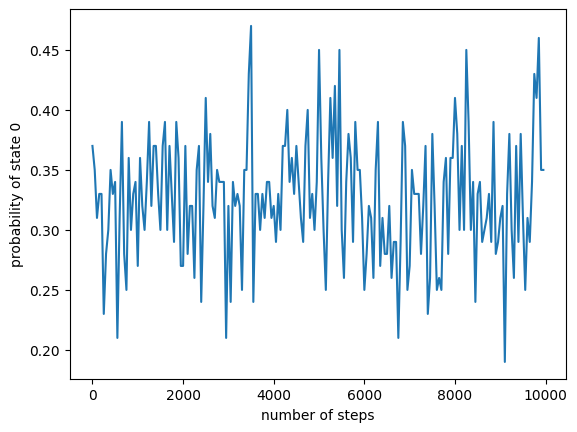

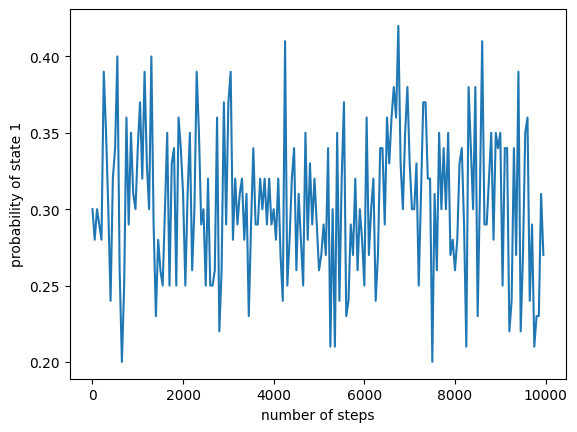

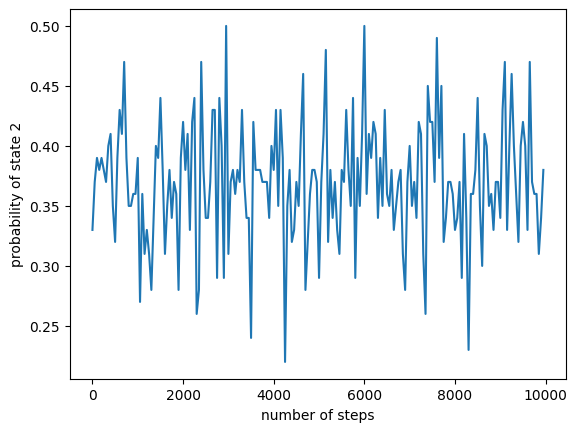

In [39]:
def itteration_over_steps(max_steps :int,test_case :list,max_simulations):
    if test_case == None :
        n = 3
    else :
        n = test_case[0]
    probs = [[] for _ in range(n)]
    for i in range(1,max_steps,50):
        prob = full_simulation(test = True, steps = i,number_of_simulations = max_simulations,test_case = test_case)
        for j in range(n) :
            probs[j].append(prob[j])
    x = [i for i in range(1,max_steps,50)]
    for i in range(n) :
        plot_signal(x,probs[i],i,"steps")
itteration_over_steps(10000,None,100)

### We could conclude that increasing the number of steps will have alternating impact on our simulation but oversal the results would be more accurate.

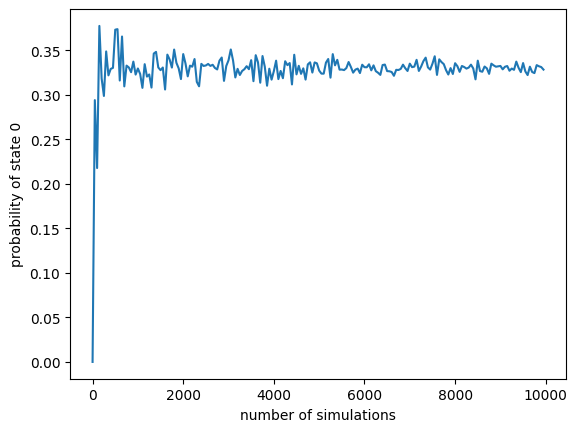

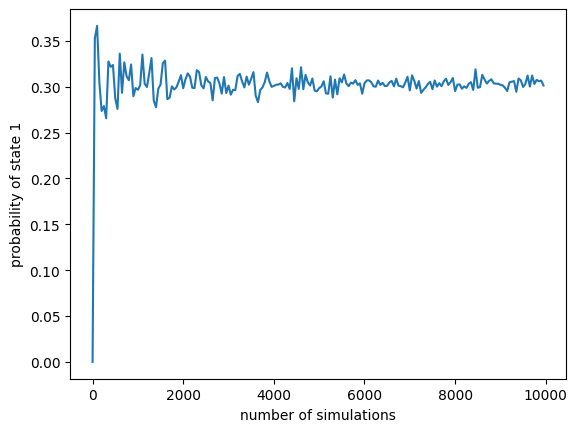

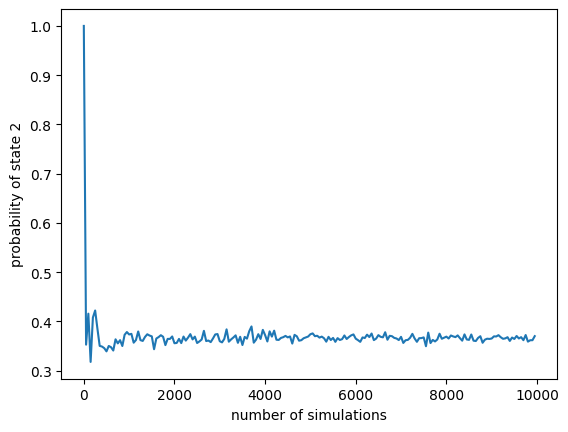

In [43]:
def itteration_over_simulations(max_steps :int,test_case :list,max_simulations):
    if test_case == None :
        n = 3
    else :
        n = test_case[0]
    probs = [[] for _ in range(n)]
    for i in range(1,max_simulations,50):
        prob = full_simulation(test = True, steps = max_steps,number_of_simulations = i,test_case = test_case)
        for j in range(n) :
            probs[j].append(prob[j])
    x = [i for i in range(1,max_simulations,50)]
    for i in range(n) :
        plot_signal(x,probs[i],i,"simulations")

itteration_over_simulations(100,None,10000)

### We could conclude that increasing the number of simulations will absolutly give us a more accurate results !!!!!

Below is another test case with 5 pages, change the test case and run it for your simulation(although you could change the parameter in the simulation test: to false so you could give input but this way is better and faster)

' 5\n[0.2, 0.1, 0.2, 0.3, 0.2]\n[[0.1, 0.2, 0.1, 0.4, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6], [0.2, 0.2, 0.2, 0.2, 0.2], [0.3, 0.4, 0.1, 0.1, 0.1], [0.5, 0.1, 0.1, 0.1, 0.2]]'

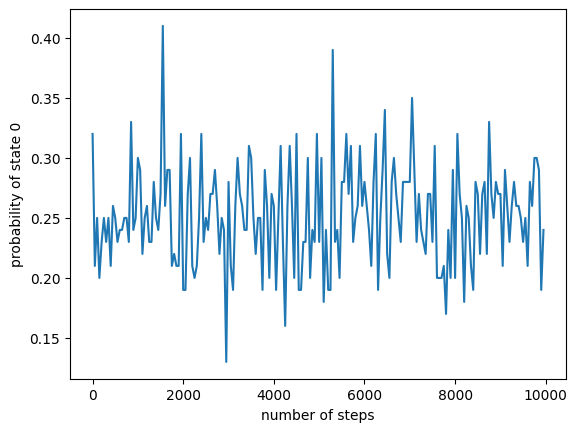

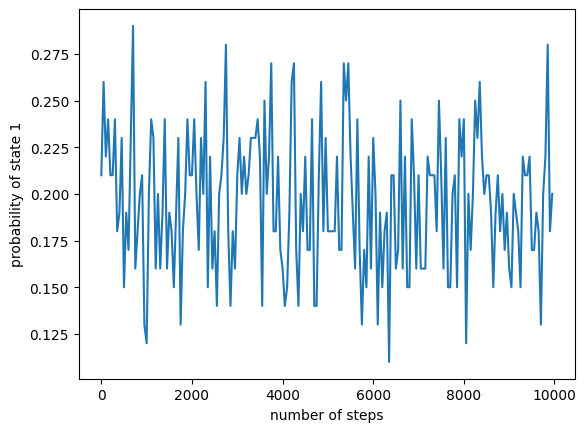

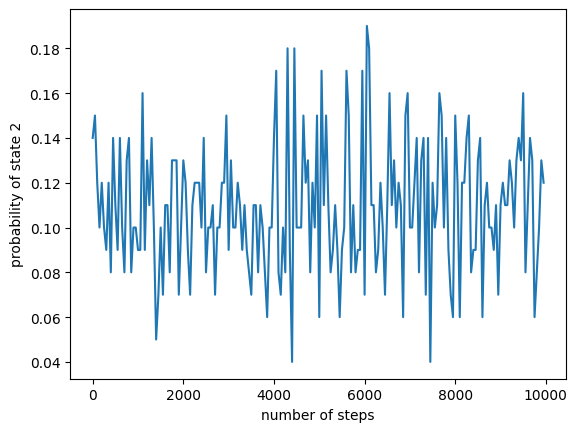

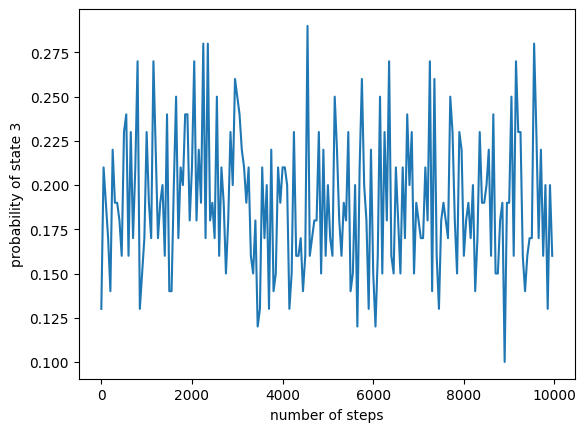

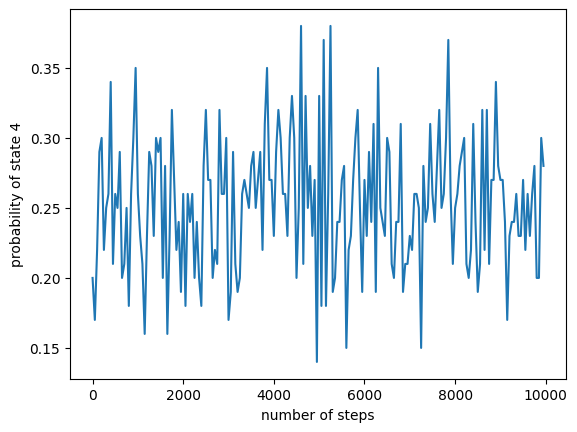

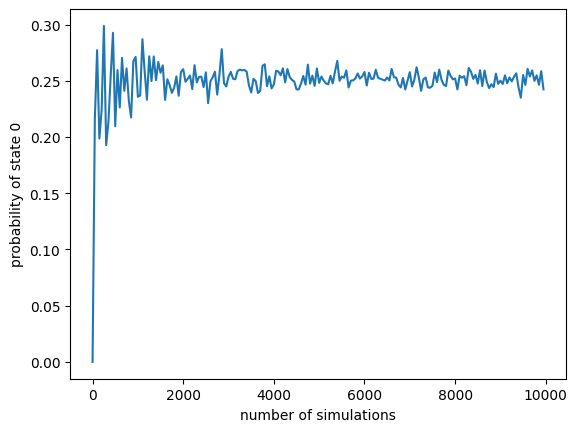

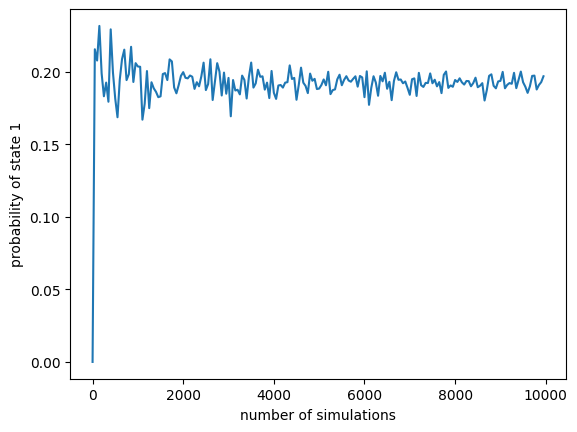

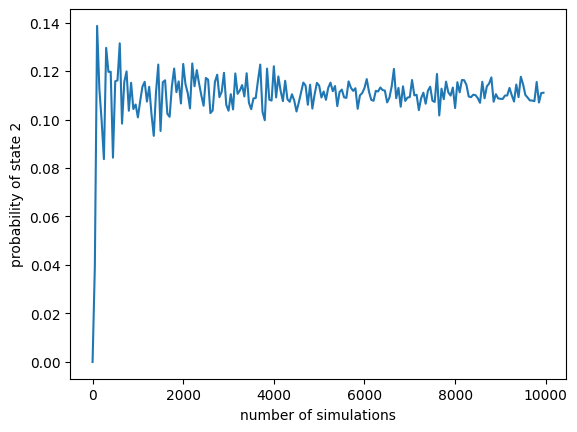

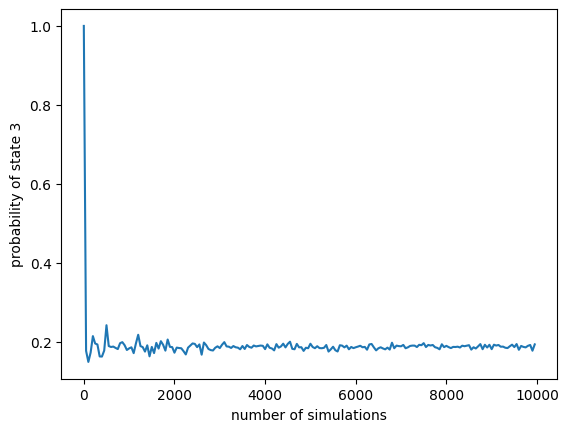

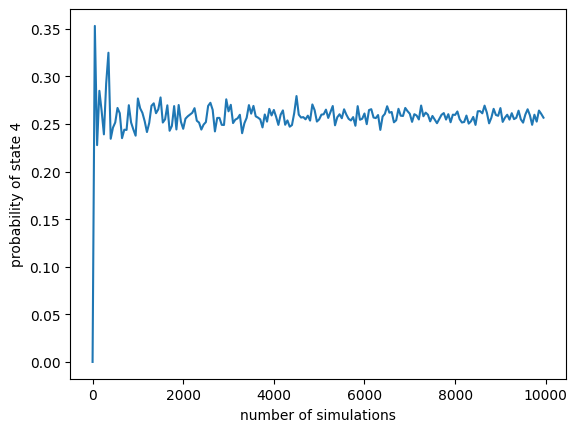

In [44]:
test_case1 = [
5,
[0.2, 0.1, 0.2, 0.3, 0.2],
[[0.1, 0.2, 0.1, 0.4, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6], [0.2, 0.2, 0.2, 0.2, 0.2], [0.3, 0.4, 0.1, 0.1, 0.1], [0.5, 0.1, 0.1, 0.1, 0.2]]
]

itteration_over_steps(10000,test_case1,100)
itteration_over_simulations(100,test_case1,10000)
''' 5
[0.2, 0.1, 0.2, 0.3, 0.2]
[[0.1, 0.2, 0.1, 0.4, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6], [0.2, 0.2, 0.2, 0.2, 0.2], [0.3, 0.4, 0.1, 0.1, 0.1], [0.5, 0.1, 0.1, 0.1, 0.2]]'''